In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

dataset = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

print(dataset.shape)
print(test_data.shape)
print(test_data.columns)
dataset.columns

(1009, 14)
(300, 13)
Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [99]:
ans = dataset.parch+dataset.sibsp+1
dataset['family'] = ans
ans = test_data.parch+test_data.sibsp+1
test_data['family'] = ans


In [101]:
def change(dataset):
    dataset.age = dataset["age"].fillna(dataset["age"].mean())
    dataset.fare = dataset["fare"].fillna(dataset["fare"].mean())
    dataset.fare = dataset["fare"].fillna(dataset["fare"].mean())
    
    dataset["sex"] = lb.fit_transform(dataset["sex"])
    dataset["fare"] = lb.fit_transform(dataset["fare"])

    col = ["pclass","sex","age","fare","family","survived"]
    dataset = dataset[col]
    dataset = dataset.dropna(axis = 0, how ='any') 
    return dataset
def change2(dataset):
    dataset.age = dataset["age"].fillna(dataset["age"].mean())
    dataset.fare = dataset["fare"].fillna(dataset["fare"].mean())
    dataset.fare = dataset["fare"].fillna(dataset["fare"].mean())
    
    dataset["sex"] = lb.fit_transform(dataset["sex"])
    dataset["fare"] = lb.fit_transform(dataset["fare"])

    col = ["pclass","sex","age","fare","family"]
    dataset = dataset[col]
    dataset = dataset.dropna(axis = 0, how ='any') 
    return dataset
dataset = change(dataset)
test_data = change2(test_data)
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 6 columns):
pclass      1009 non-null float64
sex         1009 non-null int64
age         1009 non-null float64
fare        1009 non-null int64
family      1009 non-null float64
survived    1009 non-null float64
dtypes: float64(4), int64(2)
memory usage: 55.2 KB


,pclass,sex,age,fare,family,survived
0,3.0,0,29.838978,32,1.0,0.0
1,2.0,1,39.000000,141,1.0,0.0
2,2.0,0,40.000000,88,1.0,1.0
3,3.0,0,31.000000,123,3.0,1.0
4,3.0,0,29.838978,132,3.0,1.0


In [102]:
corr_matrix = dataset.corr()
print(corr_matrix["survived"].sort_values(ascending = False))

survived    1.000000
fare        0.301213
family      0.015249
age        -0.034423
pclass     -0.317571
sex        -0.512922
Name: survived, dtype: float64


In [103]:
input_col = ["pclass","sex","age","fare","family"]
output_col = ["survived"]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 6 columns):
pclass      1009 non-null float64
sex         1009 non-null int64
age         1009 non-null float64
fare        1009 non-null int64
family      1009 non-null float64
survived    1009 non-null float64
dtypes: float64(4), int64(2)
memory usage: 55.2 KB


In [116]:
from sklearn.ensemble import RandomForestClassifier
re = RandomForestClassifier(n_estimators=57,criterion='entropy', max_depth = 5)
y_data=np.array(dataset[output_col]).reshape((-1,))
re.fit(dataset[input_col],y_data)
re.score(dataset[input_col],y_data)


0.8364717542120912

In [112]:
acc_list = []
for i in range(1,90):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),dataset[input_col],y_data,cv=5).mean()
    acc_list.append(acc)

In [130]:
acc_list1 = []
for i in range(3,20):
    acc = cross_val_score(RandomForestClassifier(n_estimators=57,max_depth=i),dataset[input_col],y_data,cv=5).mean()
    acc_list1.append(acc)

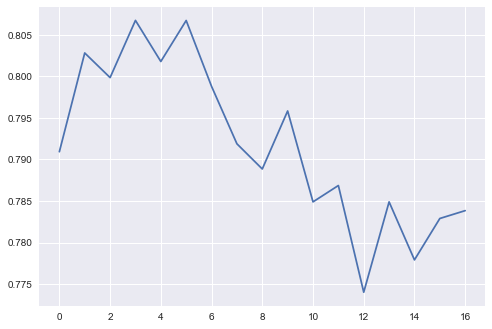

In [131]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list1)
plt.show()

In [133]:
index = np.argmax(acc_list1)
print(index)
print(acc_list1[3])

3
0.8067446021125898


In [123]:
pred = re.predict(test_data)
print(pred)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


In [129]:
dict = {"survived":pred}
ans = pd.DataFrame(dict,dtype = 'float64')
ans.to_csv("ans1.csv")